## Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.shape

(284807, 31)

Text(0, 0.5, 'Frequency')

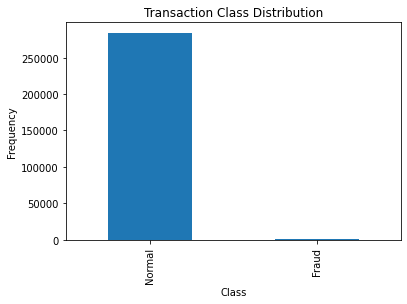

In [6]:
count_classes = pd.value_counts(df['Class'], sort = False)
count_classes.plot (kind='bar')
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS) 
plt.title ("Transaction Class Distribution")
plt.xlabel ("Class")
plt.ylabel ("Frequency")

In [7]:
df = df.drop (['Time', 'Amount'], axis = 1);

In [8]:
df.shape

(284807, 29)

In [9]:
# Null check
df.dropna(inplace=True)
(df.isnull().sum()).sort_values(ascending=False)

V1       0
V16      0
V28      0
V27      0
V26      0
V25      0
V24      0
V23      0
V22      0
V21      0
V20      0
V19      0
V18      0
V17      0
V15      0
V2       0
V14      0
V13      0
V12      0
V11      0
V10      0
V9       0
V8       0
V7       0
V6       0
V5       0
V4       0
V3       0
Class    0
dtype: int64

In [10]:
X = df.iloc[1:20000, :]
y = X.pop('Class')

In [11]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [12]:
y

1        0
2        0
3        0
4        0
5        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: Class, Length: 19999, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
X

array([[0.97635892, 0.7149142 , 0.88822067, ..., 0.30158166, 0.50877707,
        0.42805246],
       [0.89792196, 0.6870714 , 0.93385939, ..., 0.24701073, 0.50602058,
        0.41926253],
       [0.90998126, 0.70709033, 0.93442135, ..., 0.22995267, 0.51303969,
        0.43356811],
       ...,
       [0.90706017, 0.72281101, 0.89966625, ..., 0.33082703, 0.5224136 ,
        0.44067894],
       [0.90969956, 0.6817126 , 0.92840986, ..., 0.19868867, 0.51027156,
        0.40597399],
       [0.97266062, 0.71053772, 0.92625345, ..., 0.19004387, 0.51506971,
        0.43135281]])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Logistic Regression Classification

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [17]:
# fit
lr.fit(X_train,y_train)

LogisticRegression()

In [18]:
# Making predictions
predictions_lr = lr.predict(X_test)

In [19]:
# Let's check the report of our default model
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5976
           1       0.60      0.50      0.55        24

    accuracy                           1.00      6000
   macro avg       0.80      0.75      0.77      6000
weighted avg       1.00      1.00      1.00      6000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

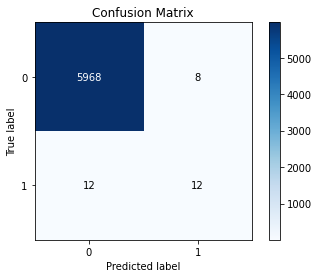

In [22]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_lr,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,predictions_lr,labels=[0,1])


In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy score:',accuracy_score(y_test,predictions_lr))

Accuracy score: 0.9966666666666667


In [24]:
from sklearn.metrics import roc_auc_score
print('ROC Accuracy:', roc_auc_score(y_test,predictions_lr))

ROC Accuracy: 0.749330655957162


* True Positive  =  Actual Positive, Predicted Positive 
* True Negative  =  Actual Negative, Predicted Negative 
*False Positive =  Atual Negative, Predicted Positive
*False Negative = Actual Negative, Predicted Negative 


In [25]:
# Get TNs, FPs, FNs, TPs

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictions_lr,labels=[0, 1])

tn, fp, fn, tp = cm.ravel()

s = f"""
True Negatives: {tn}
False Positives: {fp}
False Negatives: {fn}
True Positives: {tp}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 5968
False Positives: 8
False Negatives: 12
True Positives: 12



### Accuracy =  𝑇𝑃+𝑇𝑁/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁) 

In [28]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9966666666666667'

### Recall = Sentivity = True Positive Rate =  𝑇𝑃/(𝑇𝑃+𝐹𝑁)

In [29]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 0.5'

### False Negative Rate  =  𝐹𝑁/(𝑇𝑃+𝐹𝑁 )

In [30]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.5'

### Specificity = True Negative Rate =  𝑇𝑁/(𝑇𝑁+𝐹𝑃)

In [31]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"True Negative Rate: {0}".format(tnr(tn, fp, fn, tp))

'True Negative Rate: 0.998661311914324'

### False Postive Rate  =  𝐹𝑃/(𝑇𝑁+𝐹𝑃 )

In [32]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.0013386880856760374'

### Precision =  𝑇𝑃/(𝑇𝑃+𝐹𝑃) 

In [33]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.6'

### F1 =  2∗𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑐𝑖𝑜𝑛∗𝑅𝑒𝑐𝑎𝑙𝑙 / (𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑅𝑒𝑐𝑎𝑙𝑙)

In [34]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.5454545454545454'

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

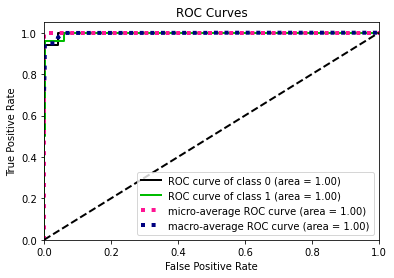

In [35]:
y_probas = lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

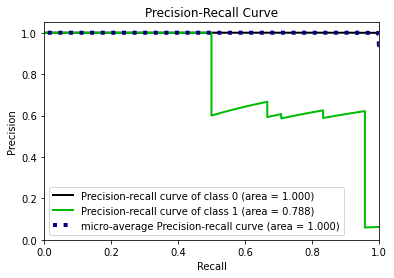

In [36]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

## K Nearest Neighbor Classification

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [38]:
# fit
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
# Making predictions
predictions_knn = knn.predict(X_test)

In [40]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5976
           1       0.94      0.71      0.81        24

    accuracy                           1.00      6000
   macro avg       0.97      0.85      0.90      6000
weighted avg       1.00      1.00      1.00      6000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

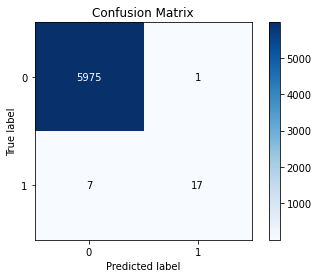

In [41]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_dtc,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

skplt.metrics.plot_confusion_matrix(y_test,predictions_knn,labels=[0,1])

In [42]:
print('Accuracy score:',accuracy_score(y_test,predictions_knn))

Accuracy score: 0.9986666666666667


In [43]:
print('ROC Accuracy:', roc_auc_score(y_test,predictions_knn))

ROC Accuracy: 0.854082998661312


## Guassian Naive Bayes Clasificatin

In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [45]:
# fit
nb.fit(X_train,y_train)

GaussianNB()

In [46]:
# Making predictions
predictions_nb = nb.predict(X_test)

In [47]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_nb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5976
           1       0.15      0.96      0.26        24

    accuracy                           0.98      6000
   macro avg       0.57      0.97      0.62      6000
weighted avg       1.00      0.98      0.99      6000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

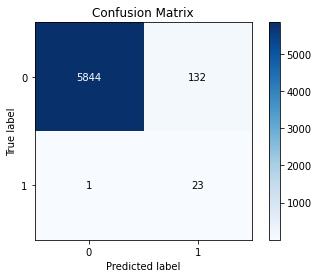

In [48]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_dtc,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

skplt.metrics.plot_confusion_matrix(y_test,predictions_nb,labels=[0,1])

In [49]:
print('Accuracy score:',accuracy_score(y_test,predictions_nb))

Accuracy score: 0.9778333333333333


In [50]:
print('ROC Accuracy:', roc_auc_score(y_test,predictions_nb))

ROC Accuracy: 0.9681224899598393


## Support Vector Machine Classification

In [51]:
from sklearn.svm import SVC
svc= SVC()

In [52]:
# fit
svc.fit(X_train,y_train)

SVC()

In [53]:
# Making predictions
predictions_svc = svc.predict(X_test)

In [54]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5976
           1       0.94      0.71      0.81        24

    accuracy                           1.00      6000
   macro avg       0.97      0.85      0.90      6000
weighted avg       1.00      1.00      1.00      6000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

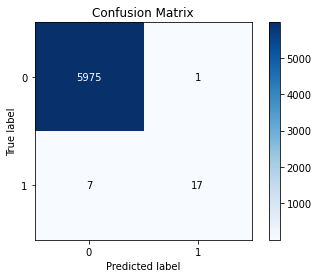

In [55]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_dtc,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

skplt.metrics.plot_confusion_matrix(y_test,predictions_svc,labels=[0,1])

In [56]:
print('Accuracy score:',accuracy_score(y_test,predictions_svc))

Accuracy score: 0.9986666666666667


In [57]:
print('ROC Accuracy:', roc_auc_score(y_test,predictions_svc))

ROC Accuracy: 0.854082998661312


## Decision Tree Classification

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)

In [59]:
# fit
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [60]:
# Making predictions
predictions_dtc = dtc.predict(X_test)

In [61]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5976
           1       0.95      0.88      0.91        24

    accuracy                           1.00      6000
   macro avg       0.98      0.94      0.96      6000
weighted avg       1.00      1.00      1.00      6000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

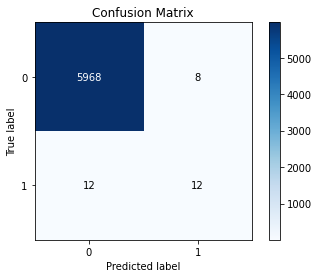

In [62]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_dtc,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

skplt.metrics.plot_confusion_matrix(y_test,predictions_dtc,labels=[0,1])

In [63]:
print('Accuracy score:',accuracy_score(y_test,predictions_dtc))

Accuracy score: 0.9993333333333333


In [64]:
print('ROC Accuracy:', roc_auc_score(y_test,predictions_dtc))

ROC Accuracy: 0.9374163319946452


## Random Forest Classificaton

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [66]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
# Making predictions
predictions_rfc = rfc.predict(X_test)

In [68]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

In [71]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5976
           1       0.95      0.88      0.91        24

    accuracy                           1.00      6000
   macro avg       0.98      0.94      0.96      6000
weighted avg       1.00      1.00      1.00      6000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

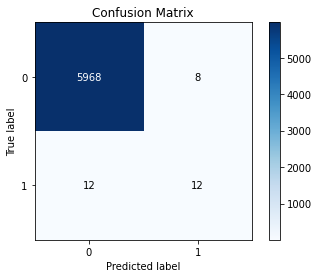

In [72]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_rfc,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

skplt.metrics.plot_confusion_matrix(y_test,predictions_rfc,labels=[0,1])

In [74]:
print('Accuracy score:',accuracy_score(y_test,predictions_rfc))
# print(accuracy_score(y_test,predictions))

Accuracy score: 0.9993333333333333


In [76]:
print('ROC Accuracy:', roc_auc_score(y_test,predictions_rfc))

ROC Accuracy: 0.9374163319946452


## Neural Network Classification

In [77]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)

In [78]:
MLPC.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)

In [79]:
# Making predictions
predictions_MLPC = MLPC.predict(X_test)

In [80]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_MLPC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5976
           1       0.62      0.67      0.64        24

    accuracy                           1.00      6000
   macro avg       0.81      0.83      0.82      6000
weighted avg       1.00      1.00      1.00      6000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

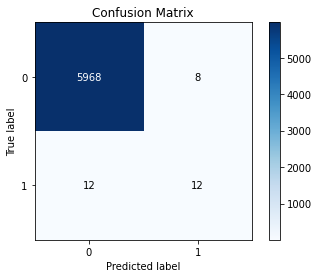

In [81]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_MLPC,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

skplt.metrics.plot_confusion_matrix(y_test,predictions_MLPC,labels=[0,1])

In [82]:
print('Accuracy score:',accuracy_score(y_test,predictions_MLPC))

Accuracy score: 0.997


In [83]:
print('ROC Accuracy:', roc_auc_score(y_test,predictions_MLPC))

ROC Accuracy: 0.8324966532797857


## Deep Learning

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model = Sequential()
model.add(Dense(64,activation='relu',input_dim=28))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

2022-07-06 23:40:58.458921: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [88]:
adam = tf.keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
X_train.shape

(13999, 28)

In [90]:
EPOCHS = 15
history = model.fit(X_train, y_train,epochs=EPOCHS,shuffle=True,batch_size = 32, validation_data=(X_test,y_test))

Epoch 1/15
438/438 [==============================] - 1s 1ms/step - loss: 0.0365 - accuracy: 0.9912 - val_loss: 0.0138 - val_accuracy: 0.9973
Epoch 2/15
438/438 [==============================] - 0s 1ms/step - loss: 0.0131 - accuracy: 0.9968 - val_loss: 0.0104 - val_accuracy: 0.9967
Epoch 3/15
438/438 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.0101 - val_accuracy: 0.9967
Epoch 4/15
438/438 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0080 - val_accuracy: 0.9967
Epoch 5/15
438/438 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0073 - val_accuracy: 0.9968
Epoch 6/15
438/438 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0122 - val_accuracy: 0.9973
Epoch 7/15
438/438 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0072 - val_accuracy: 0.9967
Epoch 

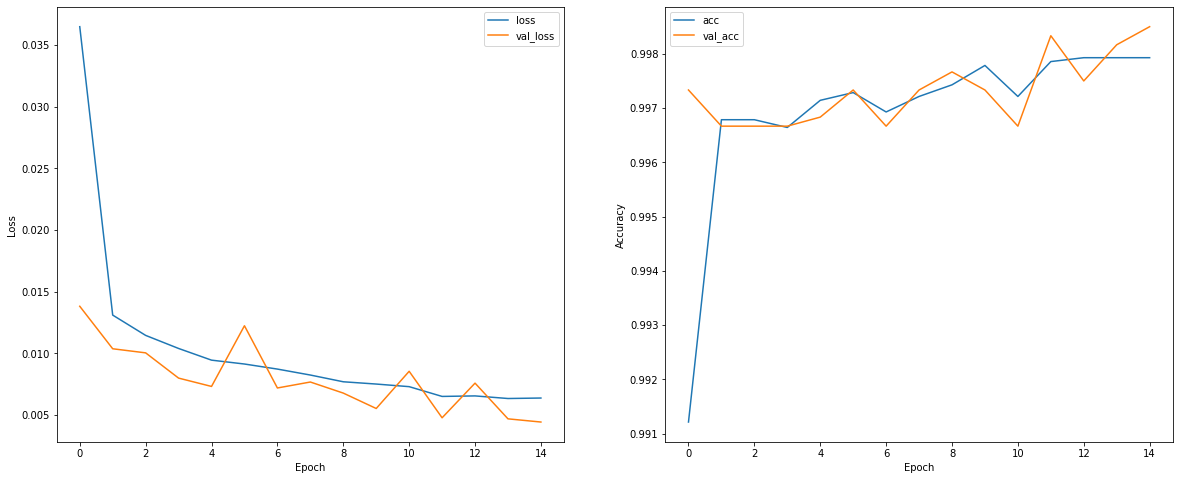

In [91]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [92]:
# Making predictions
predictions_dl = np.where(model.predict(X_test)>0.5,1,0)

In [93]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_dl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5976
           1       0.78      0.88      0.82        24

    accuracy                           1.00      6000
   macro avg       0.89      0.94      0.91      6000
weighted avg       1.00      1.00      1.00      6000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

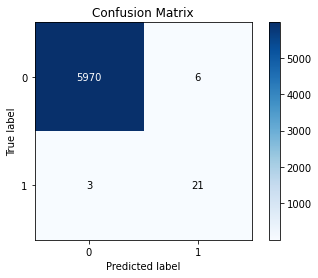

In [94]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_MLPC,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

skplt.metrics.plot_confusion_matrix(y_test,predictions_dl,labels=[0,1])

In [95]:
print('Accuracy score:',accuracy_score(y_test,predictions_dl))

Accuracy score: 0.9985


In [96]:
print('ROC Accuracy:', roc_auc_score(y_test,predictions_dl))

ROC Accuracy: 0.9369979919678715


## Hyperparameter Tunning with Grid Search

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# fit
knn.fit(X_train,y_train)

In [ ]:
# Making predictions
predictions_knn = knn.predict(X_test)

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_knn))

In [ ]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_dtc,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

skplt.metrics.plot_confusion_matrix(y_test,predictions_knn,labels=[0,1])

In [ ]:
print('Accuracy score:',accuracy_score(y_test,predictions_knn))

In [ ]:
print('ROC Accuracy:', roc_auc_score(y_test,predictions_knn))

In [ ]:
param_grid={'n_neighbors': np.arange(1,10)}

knn_cv = GridSearchCV(knn,param_grid,cv=5)

knn_cv.fit(X_train,y_train)

In [ ]:
print(knn_cv.best_params_)

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# fit
knn2.fit(X_train,y_train)

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_knn2))

In [ ]:
# Making predictions
predictions_knn2 = knn2.predict(X_test)

In [ ]:
print('Accuracy score:',accuracy_score(y_test,predictions_knn2))

In [ ]:
print('ROC Accuracy:', roc_auc_score(y_test,predictions_knn2))

## Principal Component Analysis (PCA)

In [ ]:
# import seaborn as sns
# X_df = pd.DataFrame(df)
# plt.figure(figsize=(20,20))
# sns.heatmap(X_df.corr(), vmax=1, square=True,annot=True,cmap='cubehelix')

In [ ]:
X = df.iloc[1:20000, :]
y = X.pop('Class')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
X_std.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,28,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
var_exp= pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.bar(range(28), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_std)

In [ ]:
var_exp= pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(range(10), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
X_pca.shape

In [ ]:
X_pca

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('First Principal Componnet')
plt.ylabel('Second Principal Component')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
# Making predictions
predictions_lr = lr.predict(X_test)

In [ ]:
# Let's check the report of our default model
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_lr))

In [ ]:
!pip install scikit-plot

In [ ]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_lr,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,predictions_lr,labels=[0,1])


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score:',accuracy_score(y_test,predictions_lr))

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC Accuracy:', roc_auc_score(y_test,predictions_lr))

### Compute PCA Manually

In [ ]:
cov_mat= np.cov(X_std.T)

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(range(28), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()